<b>Spectrogram Analysis of Earthquake and Non-Earthquake Signals</b>

In this notebook, we will explore how to create and analyze spectrograms for various earthquake and non-earthquake signals. A **spectrogram** is a visual representation of the spectrum of frequencies in a signal as it varies over time. It is generated by breaking down the signal into smaller time segments, applying a Fourier Transform to each segment, and then plotting the resulting frequency content over time.

Spectrograms are particularly useful in seismology because they allow us to observe how the frequency content of seismic signals changes over the course of an event, such as an earthquake. This can help us identify different types of seismic waves, distinguish between earthquake and non-earthquake signals (like explosions or ambient noise), and analyze the energy distribution across different frequencies. By visualizing these patterns, we gain deeper insights into the nature and dynamics of seismic events.


In [12]:
from obspy.clients.fdsn import Client
import matplotlib.pyplot as plt 
from obspy import UTCDateTime



<b>Comparison of Earthquake and Explosion with Similar Energy Release</b>

In this section, we will compare the spectrograms of two different seismic events: an earthquake and an explosion. Both events have a similar energy release, with a magnitude of approximately 3, and originate from a similar location. By examining the IU.TUC.00.BHZ recordings for these events, which are available from the IRIS data center, we can observe how the frequency content of the signals differs between an earthquake and an explosion. This comparison will help us understand the distinct characteristics of seismic waves generated by these two types of events.


In [13]:
client = Client("IRIS")
station = "TUC" 
channel = "BHZ"
network = "IU"
location = "00"
startt = UTCDateTime("2014-07-11T06:15:50")
endt = UTCDateTime("2014-07-11T06:17:50")
st = client.get_waveforms(network, station, location, channel, startt, endt)

<b>Extracting and Plotting the Seismic Trace</b>

We will now extract the first `Trace` object from the `Stream` we just downloaded. This `Trace` represents a single component of the seismic data. After extracting the trace, we will plot it to visualize the seismic signal.


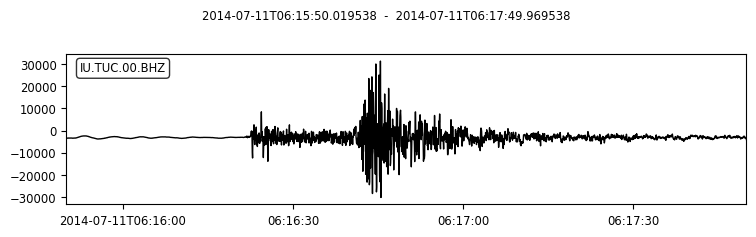

In [15]:
tr = st[0]
fig = tr.plot()

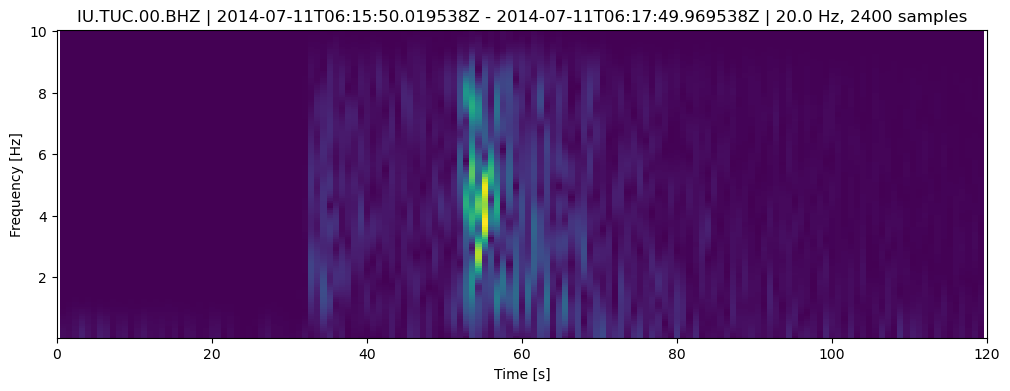

In [16]:
plt.rcParams['figure.figsize'] = (12, 4)
fig = tr.spectrogram(per_lap=.5, wlen=2)

<b>Description of the Spectrogram</b>

The spectrogram has a **horizontal axis representing time** (from 0 to approximately 120 seconds) and a **vertical axis representing frequency** (from 0 to 10 Hz). The colors within the spectrogram indicate the intensity or amplitude of various frequencies at different times.

- **Darker areas** suggest lower amplitudes.
- **Brighter colors** like yellow and green signify higher amplitudes.

<b>Patterns Observed</b>

- There is a **bright yellow vertical stripe** around the 60-second mark, which fades into green on both sides.
- This central bright area transitions to darker blues and purples, indicating less intensity towards the edges.

<b>Important Points</b>

- The bright yellow stripe suggests a significant event or spike in frequency at that specific moment in time.
- The intensity is highest around this central area and tapers off towards the edges.
- This pattern provides insight into how energy is distributed across different frequencies over time within the signal.



<b>Requesting Seismogram for Explosion Event</b>

Next, we will examine a seismogram from an explosion of similar size at the same station. The time to request for this event is December 27, 1999, at 20:58:30, and you should request the same length of time as for the earthquake.



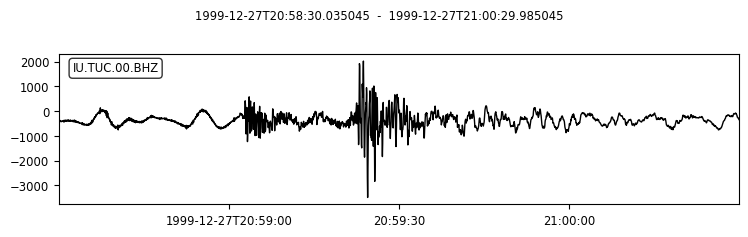

In [18]:
startt = UTCDateTime("1999-12-27T20:58:30")
endt = UTCDateTime("1999-12-27T21:00:30")
st = client.get_waveforms(network, station, location, channel, startt, endt)
tr = st[0]
fig = tr.plot()

<b>Plotting the Spectrogram of the Explosion</b>

To plot a spectrogram of the explosion with the same parameters as for the earthquake, we use the `spectrogram` method from the `Trace` object in ObsPy. The parameters used are:

- `per_lap=0.5`: This sets the overlap between consecutive windows to 50%.
- `wlen=2`: This sets the window length to 2 seconds.

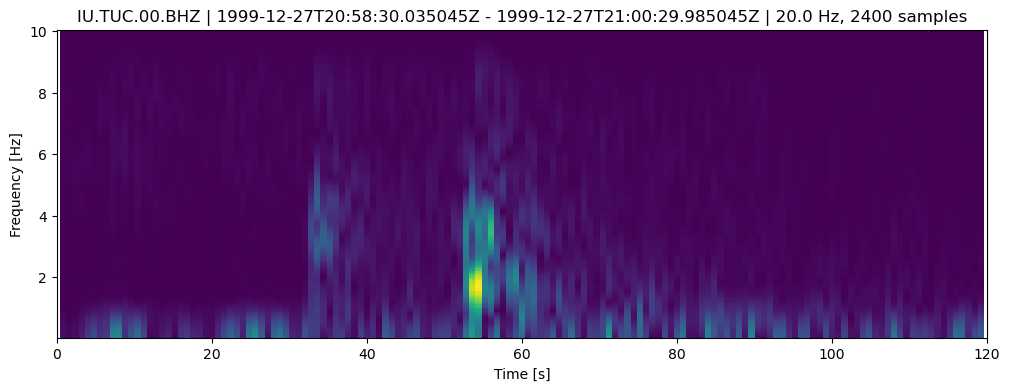

In [19]:
 fig = tr.spectrogram(per_lap=.5, wlen=2)

In [20]:
client = Client("IRIS")
net = "XV"
sta = "B15A"
loc = "01"
cha = "HHZ"
endt = UTCDateTime("2005-10-27T09:15:00")
startt = UTCDateTime("2005-10-27T08:15:00")
st = client.get_waveforms(net, sta, loc, cha, startt, endt)

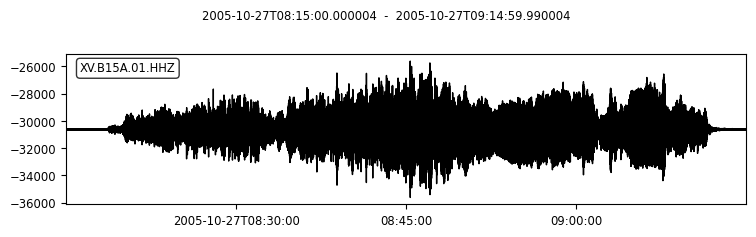

In [21]:
tr = st[0]
fig = tr.plot()

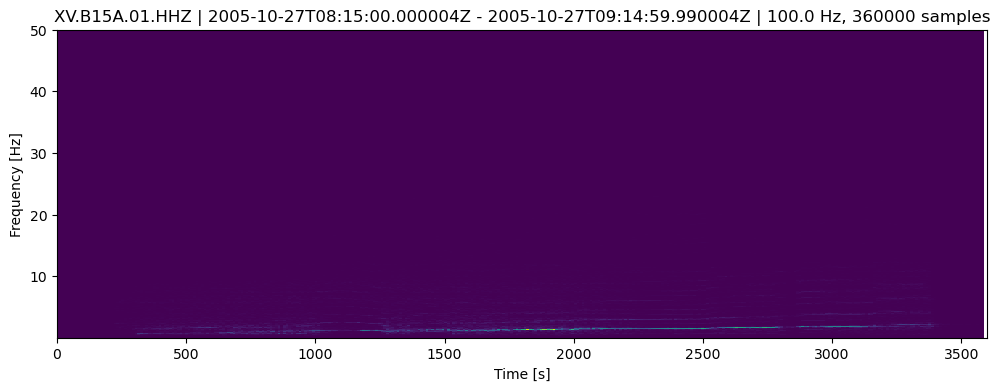

In [22]:
fig = tr.spectrogram(per_lap=0.5, wlen=25)

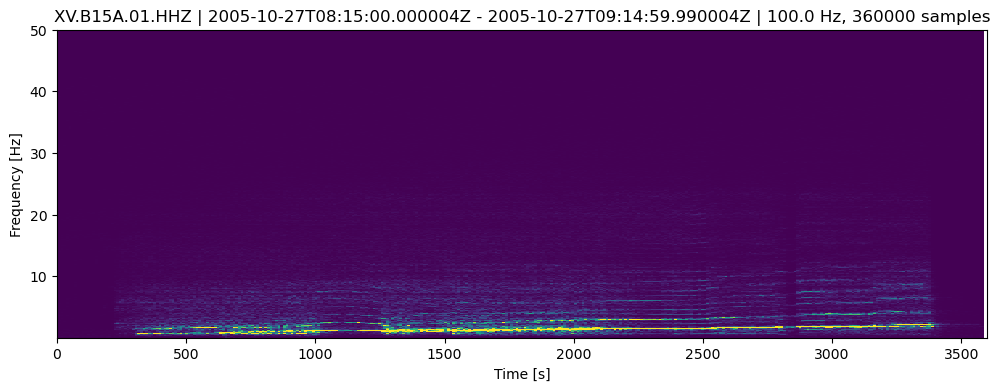

In [23]:
fig = tr.spectrogram(show=False, per_lap=.5, wlen=25)
ax = fig.axes[0]
im = ax.images[0]
im.set_clim(vmax=800)

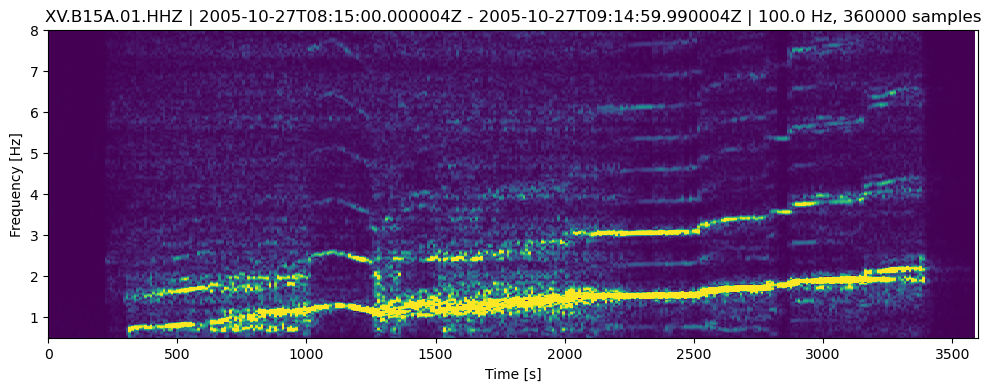

In [24]:
fig = tr.spectrogram(show=False, per_lap=.5, wlen=25)
ax = fig.axes[0]
ax.set_ylim(0.5, 8)
im = ax.images[0]
im.set_clim(vmax=800)

In [25]:
client = Client("NCEDC")
net = "BK"
sta = "PKD"
loc = ""
cha = "HHE"
startt = UTCDateTime("2002-11-03T22:18")
endt = UTCDateTime("2002-11-03T22:41")

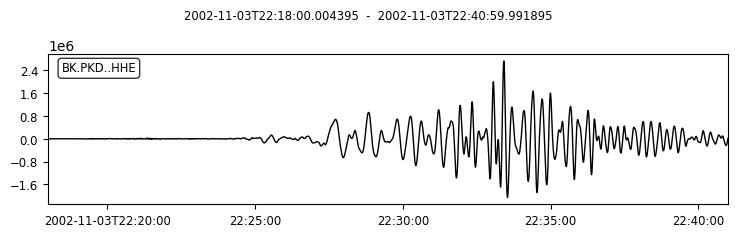

In [26]:
st = client.get_waveforms(net, sta, loc, cha, startt, endt)
tr = st[0]
fig = tr.plot()

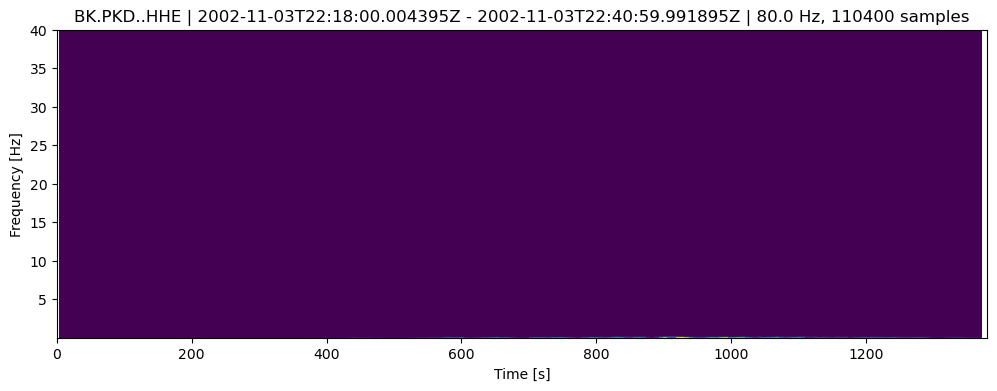

In [27]:
fig = tr.spectrogram(per_lap=.5, wlen=10)

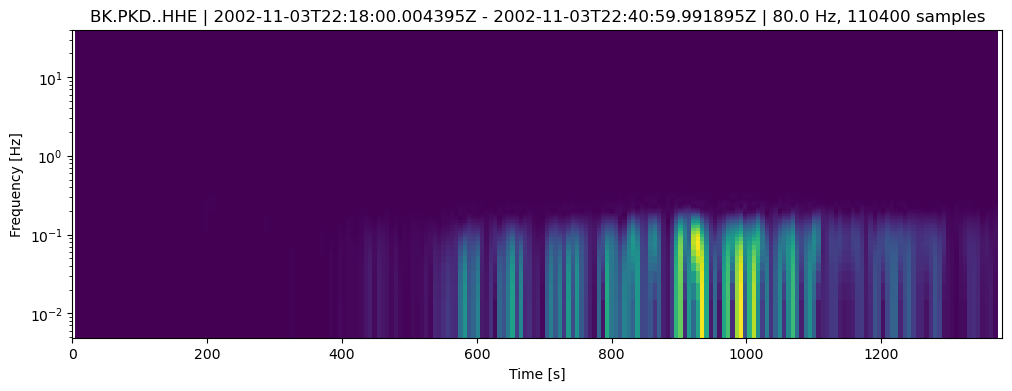

In [28]:
fig = tr.spectrogram(per_lap=.5, wlen=10, log=True)

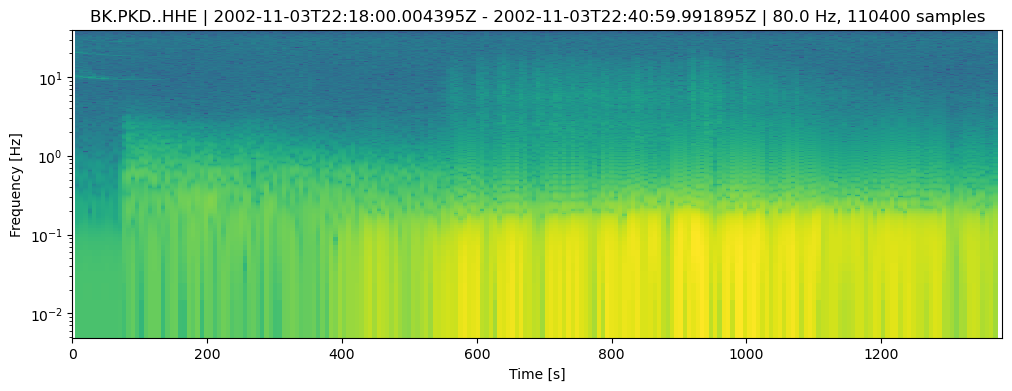

In [29]:
fig = tr.spectrogram(show=False, per_lap=.5, wlen=10, log=True, dbscale=True)

(-96.34717168809901, 134.0755363067488)


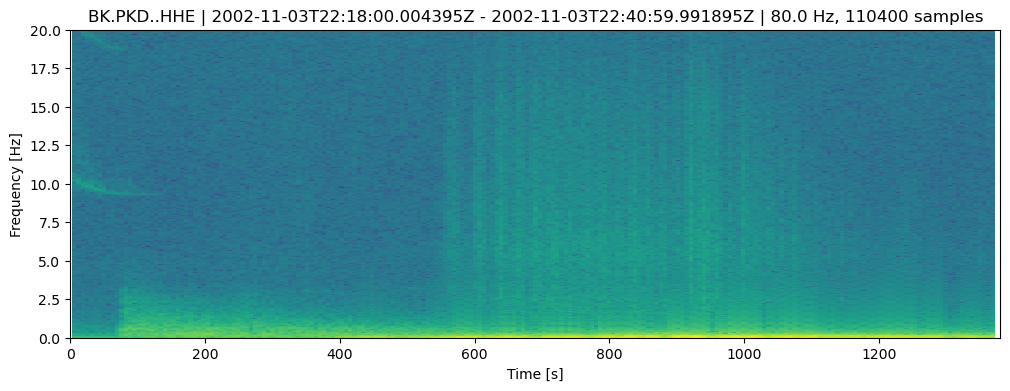

In [30]:
fig = tr.spectrogram(show=False, per_lap=.5, wlen=10, dbscale=True)
ax = fig.axes[0]
ax.set_ylim(0, 20)
im = ax.images[0]
print(im.get_clim())

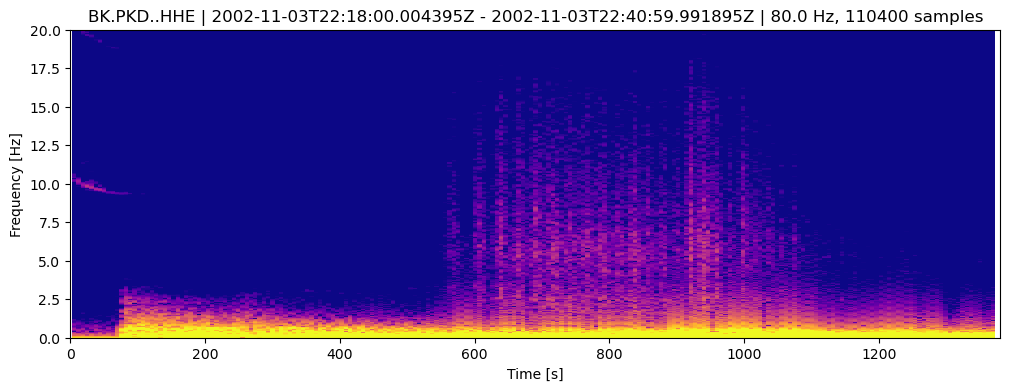

In [31]:
fig = tr.spectrogram(show=False, per_lap=.5, wlen=10, dbscale=True, cmap='plasma')
ax = fig.axes[0]
ax.set_ylim(0, 20)
im = ax.images[0]
vmin = 9.9244636932512
vmax = 69.9244636932512
im.set_clim(vmin, vmax)

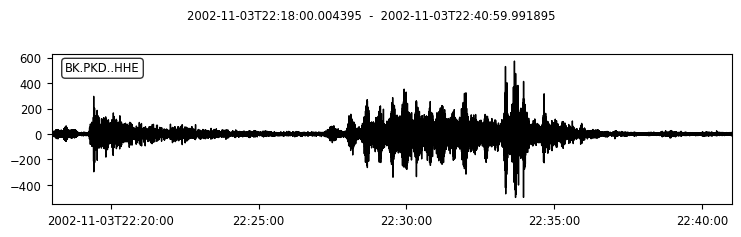

In [32]:
ftr = tr.copy()
ftr.filter(type='bandpass', freqmin=2.0, freqmax=20.0)
fig = ftr.plot()